In [1]:
#data libraries
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

#model libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn.metrics import confusion_matrix


## Converting the y_train to one-hot encoding

x_train shape: (1835, 200, 200, 3)
y_train shape: (1835, 4)
x_test shape: (459, 200, 200, 3)
y_test shape: (459, 4)


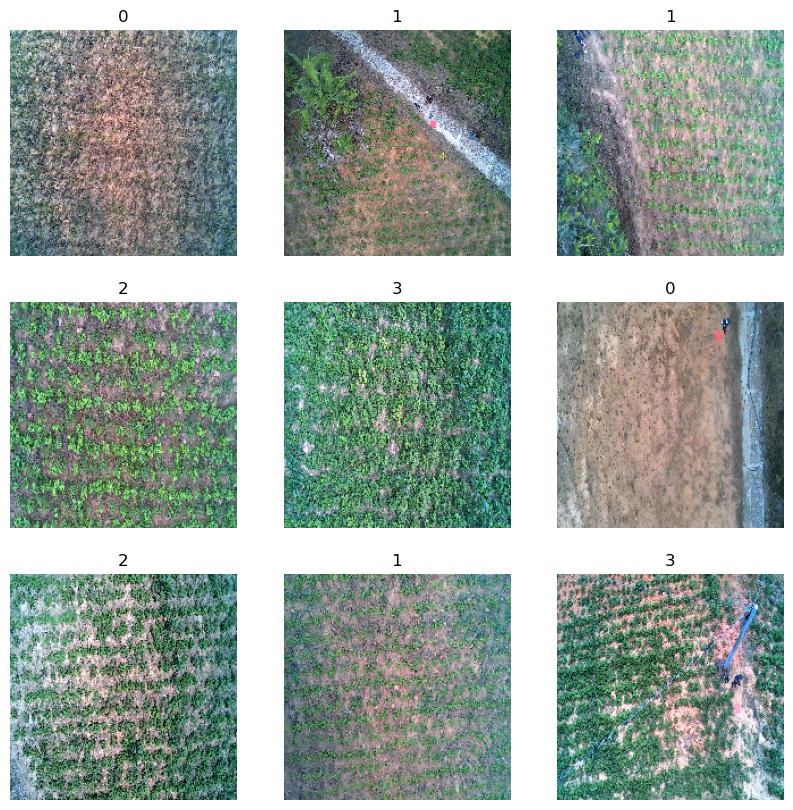

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Definir las rutas de los directorios
base_dir = r'D:\Universidad_Daniel_Suarez\2024_II\TRABAJO_DE_GRADO\Data_Set_Separado_Final\Train'

# Función para cargar imágenes y etiquetas con reducción de tamaño
def load_images_and_labels(data_dir, target_size=(200,200)):
    images = []
    labels = []
    # Obtener las subcarpetas (clases)
    subfolders = os.listdir(data_dir)
    for label in subfolders:
        class_dir = os.path.join(data_dir, label)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, file)
                img = load_img(img_path, target_size=target_size)  # Ajusta el tamaño de las imágenes
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(int(label))
    return np.array(images), np.array(labels)

# Cargar los datos
x_data, y_data = load_images_and_labels(base_dir, target_size=(200, 200))

# Convertir las etiquetas a one-hot encoding
class_names = ['0', '1', '2', '3']
nclasses = len(class_names)
y_data_one_hot = to_categorical(y_data, nclasses)

# Dividir en entrenamiento y prueba
x_train, x_test, y_train_one_hot, y_test_one_hot = train_test_split(x_data, y_data_one_hot, test_size=0.2, random_state=42)

# Verificar la carga de datos
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train_one_hot.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test_one_hot.shape}')

# Seleccionar índices aleatorios para visualización
random_indices = np.random.choice(len(x_train), 9, replace=False)
plt.figure(figsize=(10, 10))

for i, index in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)  
   
    img = x_train[index] * 255 if x_train[index].max() <= 1 else x_train[index]
    img = img.astype(np.uint8)
    plt.imshow(img)  
    plt.title(class_names[np.argmax(y_train_one_hot[index])])  
    plt.axis("off")  

plt.show()


# Final Model

In [3]:
# Imprimir las formas actuales de los arrays
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train_one_hot.shape}')
print(f'y_test shape: {y_test_one_hot.shape}')

# Concatenar los datos de Train y Test
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train_one_hot, y_test_one_hot), axis=0)

# Imprimir las formas después de concatenar
print(f'X shape after concatenation: {X.shape}')
print(f'y shape after concatenation: {y.shape}')

# Verificar que las formas coincidan con las esperadas
assert X.shape == (2294, 200, 200, 3), f"Expected X shape (2298, 200, 200, 3), got {X.shape}"
assert y.shape == (2294, 4), f"Expected y shape (2294, 4), got {y.shape}"


x_train shape: (1835, 200, 200, 3)
x_test shape: (459, 200, 200, 3)
y_train shape: (1835, 4)
y_test shape: (459, 4)
X shape after concatenation: (2294, 200, 200, 3)
y shape after concatenation: (2294, 4)


In [4]:
#data libraries
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

#model libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn.metrics import confusion_matrix


## **Entrenamineto y Resultados**

In [5]:
from sklearn.model_selection import StratifiedKFold


C:\Users\suare\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold # 0
------------------------------------------------------------------------------------------------------
Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.5885 - loss: 5.4743
Epoch 1: val_loss improved from inf to 1.86007, saving model to Mejor_Modelo_fold1.keras
255/255 ━━━━━━━━━━━━━━━━━━━━ 120s 449ms/step - accuracy: 0.5890 - loss: 5.4657 - val_accuracy: 0.7778 - val_loss: 1.8601 - learning_rate: 0.0010
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.8906 - loss: 1.2975
Epoch 2: val_loss did not improve from 1.86007
255/255 ━━━━━━━━━━━━━━━━━━━━ 113s 442ms/step - accuracy: 0.8907 - loss: 1.2968 - val_accuracy: 0.7673 - val_loss: 4.7674 - learning_rate: 0.0010
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9425 - loss: 0.7723
Epoch 3: val_loss improved from 1.86007 to 1.05100, saving model to Mejor_Modelo_fold1.keras
255/255 ━━━━━━━━━━━━━━━━━━━━ 111s 435ms/step - accuracy: 0.9425 - loss: 0.7722 - val_accuracy: 0.9124 

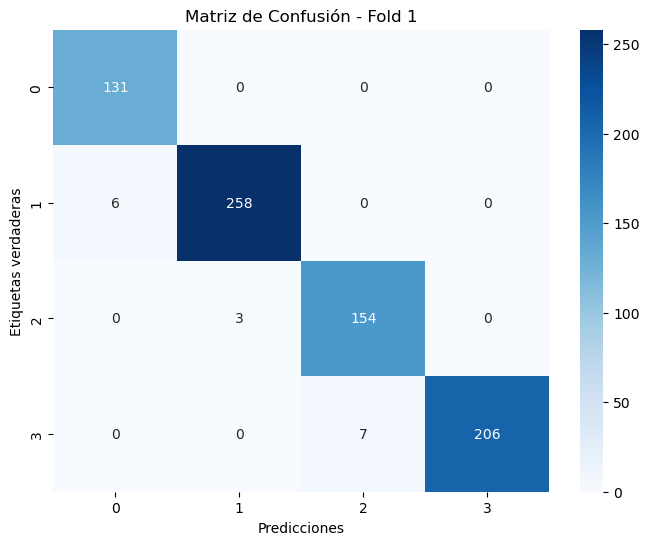

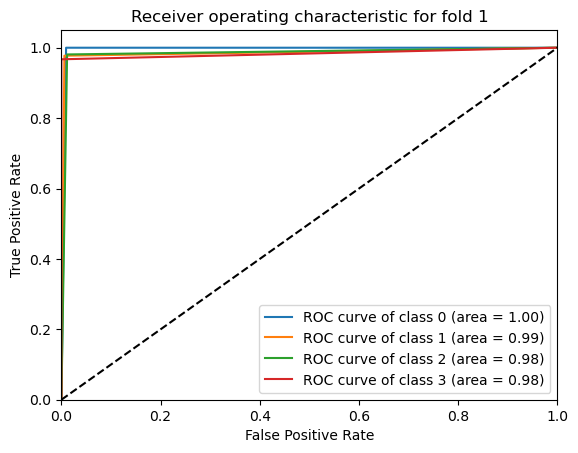

C:\Users\suare\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold # 1
------------------------------------------------------------------------------------------------------
Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.5922 - loss: 4.7006
Epoch 1: val_loss improved from inf to 5.89315, saving model to Mejor_Modelo_fold2.keras
255/255 ━━━━━━━━━━━━━━━━━━━━ 123s 472ms/step - accuracy: 0.5928 - loss: 4.6940 - val_accuracy: 0.5085 - val_loss: 5.8932 - learning_rate: 0.0010
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9037 - loss: 1.1298
Epoch 2: val_loss improved from 5.89315 to 5.39180, saving model to Mejor_Modelo_fold2.keras
255/255 ━━━━━━━━━━━━━━━━━━━━ 120s 470ms/step - accuracy: 0.9037 - loss: 1.1292 - val_accuracy: 0.6484 - val_loss: 5.3918 - learning_rate: 0.0010
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9268 - loss: 0.8025
Epoch 3: val_loss did not improve from 5.39180
255/255 ━━━━━━━━━━━━━━━━━━━━ 120s 472ms/step - accuracy: 0.9267 - loss: 0.8033 - val_accuracy: 0.6837 

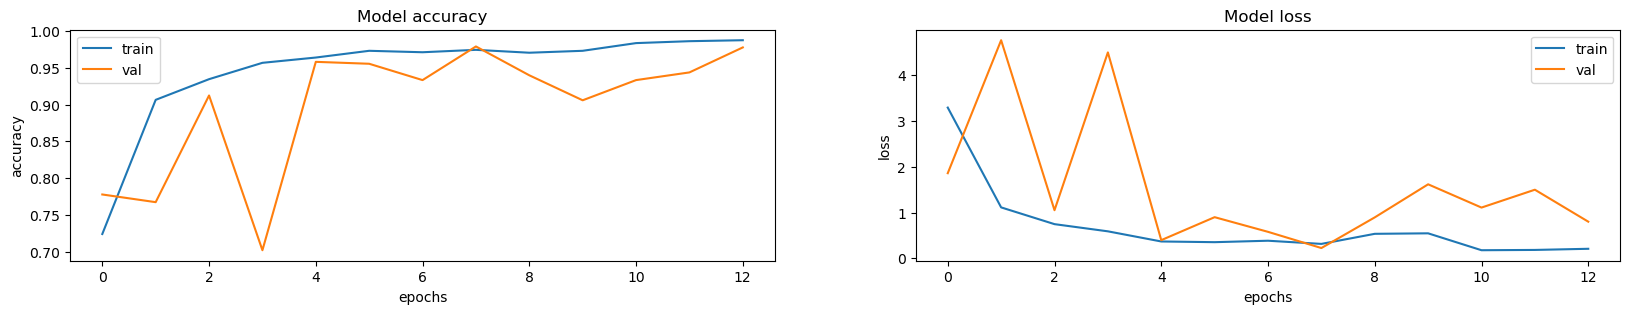

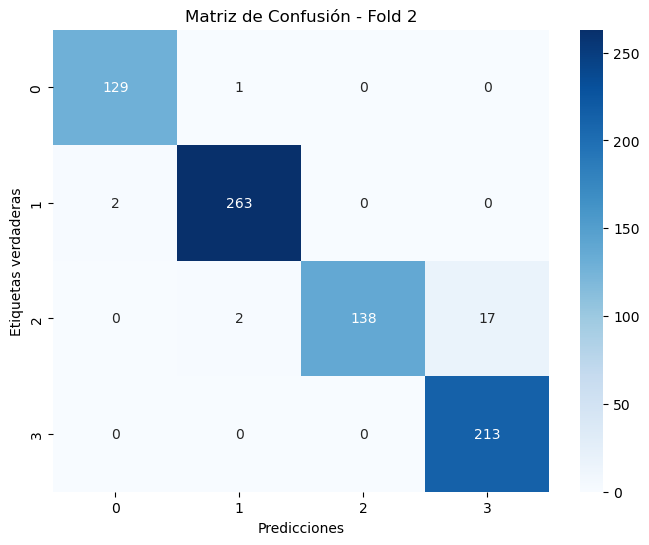

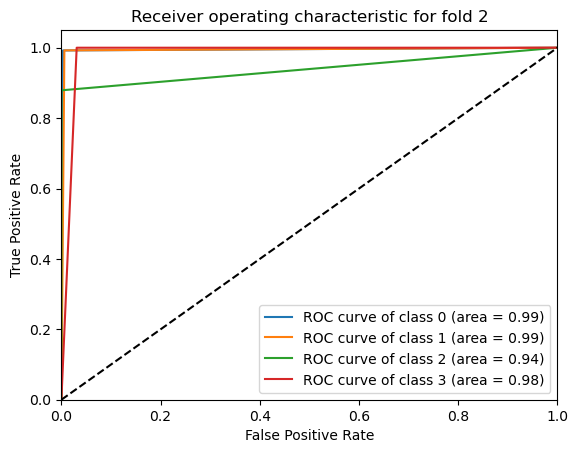

C:\Users\suare\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold # 2
------------------------------------------------------------------------------------------------------
Epoch 1/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.6147 - loss: 4.4497
Epoch 1: val_loss improved from inf to 1.80916, saving model to Mejor_Modelo_fold3.keras
255/255 ━━━━━━━━━━━━━━━━━━━━ 133s 509ms/step - accuracy: 0.6151 - loss: 4.4445 - val_accuracy: 0.7291 - val_loss: 1.8092 - learning_rate: 0.0010
Epoch 2/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.8747 - loss: 1.5896
Epoch 2: val_loss improved from 1.80916 to 0.24601, saving model to Mejor_Modelo_fold3.keras
255/255 ━━━━━━━━━━━━━━━━━━━━ 131s 514ms/step - accuracy: 0.8748 - loss: 1.5889 - val_accuracy: 0.9634 - val_loss: 0.2460 - learning_rate: 0.0010
Epoch 3/100
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.9194 - loss: 1.1129
Epoch 3: val_loss did not improve from 0.24601
255/255 ━━━━━━━━━━━━━━━━━━━━ 131s 513ms/step - accuracy: 0.9195 - loss: 1.1121 - val_accuracy: 0.8927 

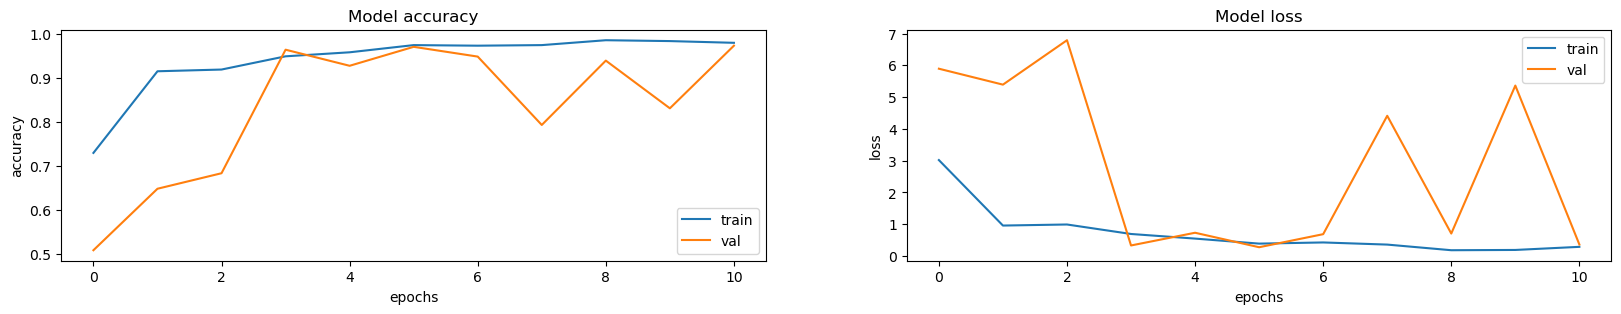

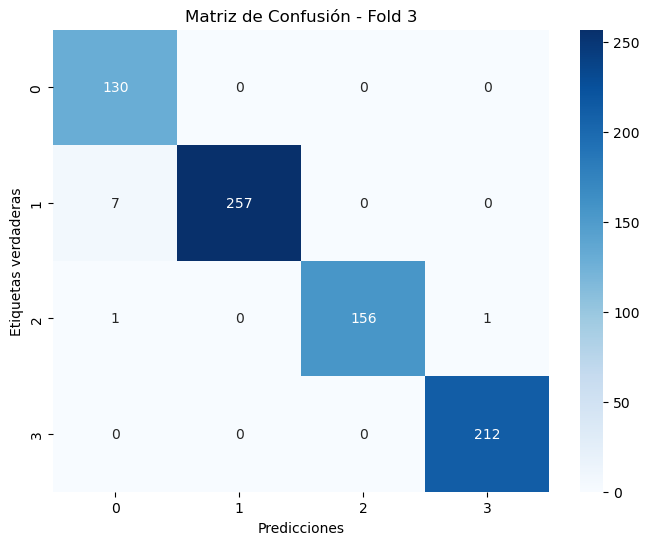

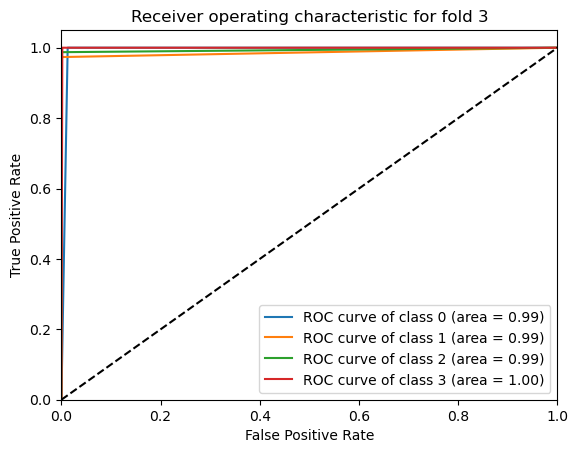

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 200, 200, 64)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 200, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 200, 200, 64)   │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 200, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 100, 100, 64)   │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 50, 50, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │       160,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 632,590 (2.41 MB)

 Trainable params: 210,692 (823.02 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 421,386 (1.61 MB)

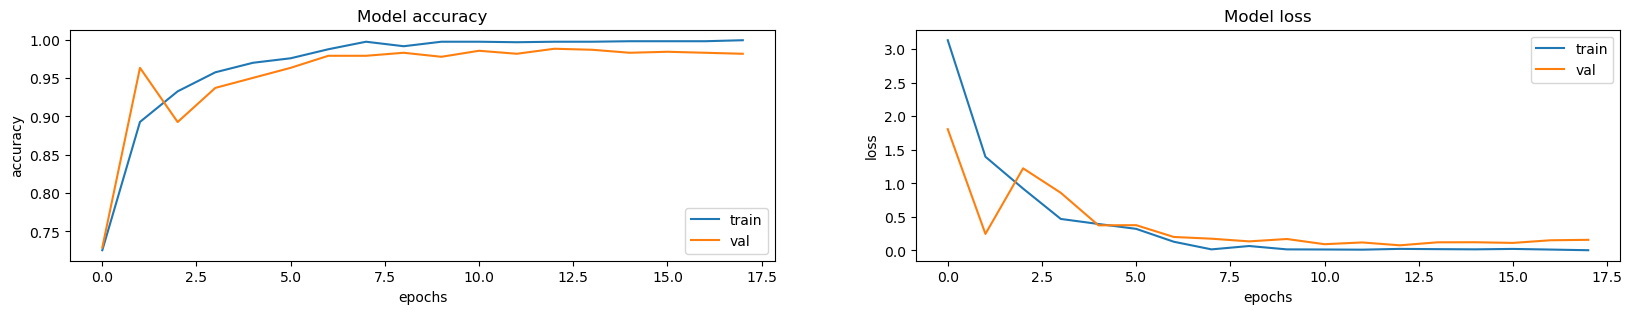

In [6]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

n_classes = 4  # Número de clases

# K-Fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Usando StratifiedKFold
Acc_kfolds = []
n_fold = 0

for train, test in skf.split(X, np.argmax(y, axis=1)):  # Ajustar la división para usar etiquetas únicas
    modelr = keras.Sequential()
    # Capas del modelo
    modelr.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(200, 200, 3), kernel_initializer="glorot_uniform"))
    modelr.add(layers.BatchNormalization())
    modelr.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    modelr.add(layers.BatchNormalization())
    modelr.add(layers.MaxPooling2D(pool_size=(2, 2)))
    modelr.add(layers.Dropout(0.3))
    modelr.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    modelr.add(layers.BatchNormalization())
    modelr.add(layers.MaxPooling2D(pool_size=(2, 2)))
    modelr.add(layers.Dropout(0.4))
    modelr.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    modelr.add(layers.BatchNormalization())
    modelr.add(layers.MaxPooling2D(pool_size=(2, 2)))
    modelr.add(layers.Dropout(0.5))
    modelr.add(layers.Flatten())
    modelr.add(layers.Dense(n_classes, activation='softmax'))

    modelr.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    print(f'Fold # {n_fold}')
    n_fold += 1
    print('------------------------------------------------------------------------------------------------------')

    callback = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=4, verbose=1),
        tf.keras.callbacks.ModelCheckpoint(f'Mejor_Modelo_fold{n_fold}.keras', monitor='val_loss', verbose=1, save_best_only=True),
    ]

    history = modelr.fit(X[train], y[train], batch_size=6, epochs=100, verbose=1, validation_data=(X[test], y[test]), callbacks=callback)

    best_model = keras.models.load_model(f'Mejor_Modelo_fold{n_fold}.keras')
    metrics = best_model.evaluate(X[test], y[test])

    y_pred = best_model.predict(X[test])
    y_pred = np.argmax(y_pred, axis=1)

    # Matriz de confusión
    cm = confusion_matrix(np.argmax(y[test], axis=1), y_pred)
    labels = ['0', '1', '2', '3']

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas verdaderas')
    plt.title(f'Matriz de Confusión - Fold {n_fold}')
    plt.show()

    # Curvas ROC
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[test][:, i], keras.utils.to_categorical(y_pred, num_classes=n_classes)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for fold {n_fold}')
    plt.legend(loc="lower right")
    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(20, 3))
    ax = ax.ravel()
    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title(f'Model {met}')
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['train', 'val'])

    Acc_kfolds.append(metrics[1])

modelr.summary()



24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 1.0000 - loss: 1.0399e-04
Test Loss: 0.0003970632969867438
Test Accuracy: 1.0
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       264
           2       1.00      1.00      1.00       158
           3       1.00      1.00      1.00       212

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764



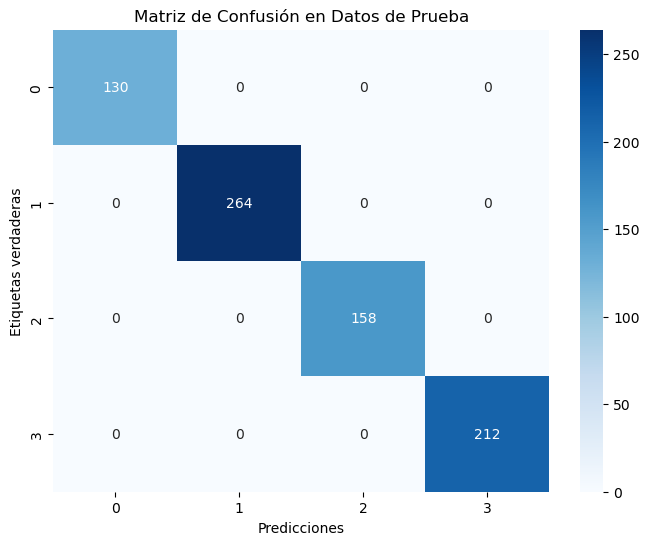

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

# Definir x_test y y_test con los valores del primer fold
x_test = X[test]  # Cambia 'test' por el índice de tu conjunto de prueba específico
y_test = y[test]

# Carga el mejor modelo guardado
best_model_path = 'Mejor_Modelo_fold1.keras'  # Cambia esto si otro modelo fue el mejor
best_model = keras.models.load_model(best_model_path)

# Evaluación del modelo en los datos de prueba
test_metrics = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_metrics[0]}")
print(f"Test Accuracy: {test_metrics[1]}")

# Realiza las predicciones en el conjunto de prueba
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Genera el informe de clasificación
report = classification_report(y_true, y_pred_classes, target_names=['0', '1', '2', '3'])
print("Classification Report:")
print(report)

# Calcula y visualiza la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
labels = ['0', '1', '2', '3']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión en Datos de Prueba')
plt.show()



x_test shape: (132, 200, 200, 3)
y_test shape: (132,)
y_test shape after one-hot encoding: (132, 4)
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.9944 - loss: 0.0909
Test Loss: 0.12372340261936188
Test Accuracy: 0.9924242496490479
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.97      1.00      0.99        34
           2       1.00      0.97      0.98        29
           3       1.00      1.00      1.00        45

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132



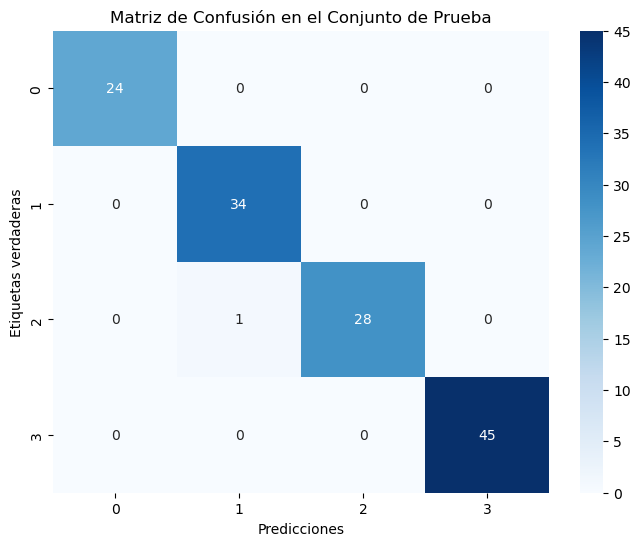

In [8]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Definir la ruta del directorio de pruebas
test_dir = r'D:\Universidad_Daniel_Suarez\2024_II\TRABAJO_DE_GRADO\Data_Set_Separado_Final\Pruebas_separadas'

# Función para cargar imágenes y etiquetas con reducción de tamaño
def load_images_and_labels(data_dir, target_size=(200, 200)):
    images = []
    labels = []
    # Obtener las subcarpetas (clases)
    subfolders = os.listdir(data_dir)
    for label in subfolders:
        class_dir = os.path.join(data_dir, label)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, file)
                img = load_img(img_path, target_size=target_size)  # Ajusta el tamaño de las imágenes
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(int(label))  # Asegura que las etiquetas sean enteros simples
    return np.array(images), np.array(labels)

# Cargar los datos de prueba
x_test, y_test = load_images_and_labels(test_dir, target_size=(200, 200))

# Verificar la carga de datos
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Convertir y_test a formato "one-hot encoded"
y_test = to_categorical(y_test, num_classes=4)
print(f'y_test shape after one-hot encoding: {y_test.shape}')

# Cargar el mejor modelo guardado
best_model_path = 'Mejor_Modelo_fold1.keras'  # Cambia esto si otro modelo fue el mejor
best_model = keras.models.load_model(best_model_path)

# Evaluación del modelo en los datos de prueba
test_metrics = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_metrics[0]}")
print(f"Test Accuracy: {test_metrics[1]}")

# Realiza las predicciones en los datos de prueba
y_pred_test = best_model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Convertir y_test nuevamente a etiquetas enteras para el informe de clasificación y la matriz de confusión
y_test_labels = np.argmax(y_test, axis=1)

# Genera el informe de clasificación
test_report = classification_report(y_test_labels, y_pred_test_classes, target_names=['0', '1', '2', '3'])
print("Test Classification Report:")
print(test_report)

# Calcula y visualiza la matriz de confusión
cm_test = confusion_matrix(y_test_labels, y_pred_test_classes)
labels = ['0', '1', '2', '3']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión en el Conjunto de Prueba')
plt.show()


In [9]:
from tensorflow import keras

# Guarda el modelo en un archivo
best_model_path = 'Mejor_Modelo_fold_Entrega_final_TG.keras'
best_model.save(best_model_path)
